diamonds veri setini projemize ekliyoruz.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df= sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"])


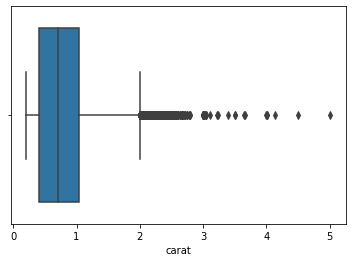

In [ ]:
sns.boxplot(x=df.carat)

In [ ]:
print(df.carat.quantile(0.50))

0.7


In [ ]:
df.table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

aykırı değerler(outliers) boxplot ile görüntülenebiliyor.box plot içerisinde aykırı değer Q1-1.5xIQR ve Q3 + 1.5xIQR aralığı dışında kalan değerler olarak hesaplanır.

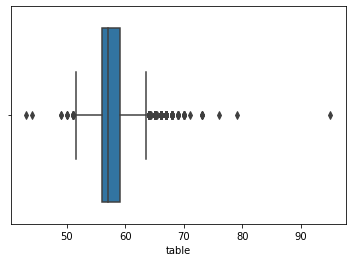

In [ ]:
sns.boxplot(x=df.table);

Sağlamayı kendimiz istersek yapabiliriz.

In [ ]:
Q1 = df.table.quantile(0.25)
Q2 = df.table.quantile(0.50)
Q3 = df.table.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q2,Q3)
print(IQR)

56.0 57.0 59.0
3.0


Alt Sınır

In [ ]:
below = Q1 - IQR*1.5
below

51.5

Üst Sınır


In [ ]:
above = Q3+IQR*1.5
above

63.5

In [ ]:
df_table = df.table

In [ ]:
outliers = (df_table< below) | (df_table>above)
outliers

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

Fancy index kullanarak heaplamış olduğumuz aykırı değerleri seçebiliriz.

In [ ]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

İndexlerini görebilmek için.

In [ ]:
df_table[outliers].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [ ]:
import pandas as pd

In [ ]:
type(df_table)

pandas.core.series.Series

In [ ]:
df_table = pd.DataFrame(df_table)

In [ ]:
df_table.shape

(53940, 1)

Aykırı gözlemleri görmek istemiyorsak tilda işaretini kullanarak istediğimiz durumun değilini alırız ve aykırı değerle dışındaki değerleri görebiliriz.

In [ ]:
c_df = df_table[~((df_table<below) | (df_table>above)).any(axis = 1)]
c_df.mean()

table    57.373404
dtype: float64

In [ ]:
df_table = df.table
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [ ]:
df_table[outliers]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [ ]:
df_table.mean()

57.45718390804603

Aykırı değerleri atmak istemiyorsak değişkenin ortalamasıyla değiştirebiliriz.

In [ ]:
df_table[outliers]=df_table.mean()

In [ ]:
df_table[outliers]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [ ]:
import seaborn as sns
df= sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"])
df= df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


Baskılama yönteminide kullanabiliriz bu yönteml below dan aşağıdakileri belowa ve abovedan yukardakileri above a eşitleriz.

In [ ]:
df_table = df.table
df_table = pd.DataFrame(df_table)

In [ ]:
below_outliers = df_table< below
above_outliers = df_table>above

In [ ]:
df_table[below_outliers] = below

In [ ]:
df_table[above_outliers] = above

In [ ]:
df_table[above_outliers]

,table
0,NaN
1,NaN
2,63.5
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
df_table[outliers]

,table
2,63.5
91,63.5
145,63.5
219,63.5
227,63.5
...,...
53695,63.5
53697,63.5
53756,63.5
53757,63.5


In [ ]:
import seaborn as sns
df= sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"])
df= df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


Eğer aykırı değerleri ne atmak ne de baskılamak istemiyorsak yerelde onları komşularının değerlerinin ortalamasına eşitleyebiliriz.

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

20 Komşu dikkate alınacak

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [ ]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
df_scores = clf.negative_outlier_factor_

In [ ]:
df_scores

array([-1.57909232, -1.5941939 , -1.56222304, ..., -1.0673167 ,
       -1.00664973, -1.00853026])

In [ ]:
np.sort(df_scores)[0:20]

array([-8.69700263, -8.26545561, -5.86153222, -4.47421704, -4.27466019,
       -4.2361892 , -4.2361892 , -4.21892191, -4.10492387, -4.0566648 ,
       -4.0539293 , -3.82378797, -3.65947378, -3.60511697, -3.50040265,
       -3.45066056, -3.43137206, -3.42371582, -3.32015348, -3.29322345])

Eşik değeri seçilir

In [ ]:
np.sort(df_scores)[13]

-3.6051169745064904

In [ ]:
threshold = np.sort(df_scores)[13]

eşik değerinden yüksek olanlar outliers olarak işaretlendi

In [ ]:
outliers = df_scores>threshold
outliers

array([ True,  True,  True, ...,  True,  True,  True])

outliersler çıkarıldı

In [ ]:
new_df = df[df_scores>threshold]
new_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


outliersler a bakmak istersek burdan bakabiliriz


In [ ]:
df[df_scores<threshold]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


çok değişken için yapacağımız zaman baskılama değerimizi seçtiğimiz eşik değerine göre seçiyoruz.

In [ ]:
press_val = df[df_scores==threshold]

In [ ]:
press_val

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [ ]:
outliers= df[df_scores<threshold]

In [ ]:
res = outliers.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [ ]:
res[:] = press_val.to_records(index=False)

In [ ]:
df[df_scores<threshold] = pd.DataFrame(res,index=df[df_scores<threshold].index)

In [ ]:
df[df_scores<threshold]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


In [ ]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

her değer için eksik gözlemlerin sayısını belirledik.

In [ ]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

her değer için eksik olmayan gözlemleri belirledik.


In [ ]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

toplam eksik değerlerin sayısını belirledik.

In [ ]:
df.isnull().sum().sum()

7

In [ ]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [ ]:
df[df.isnull()]

,V1,V2,V3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN


en az bir değerin null olma durumuna baktık.

In [ ]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


tüm değerlerin null olmama durumuna baktık.

In [ ]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


inplace true diyerek yaptığımız ilemin kalıcı olmasını sağladık.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
mean = df.V1.mean()
mean

6.0

Diğer bir yaklaşım olan eksik gözlemleri ortalama ile doldurduk.

In [ ]:
df.V1.fillna(mean)

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

veya direkt olarak 0 ile de doldurabibiliriz.

In [ ]:
df.V2.fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [ ]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

değişkenlerin null değerlerini her değişkenin ortalaması ile değiştirebiliriz bunun için lambda kullanabiliriz bu birinci yol
### 1.Yol

In [ ]:
function = lambda x : x.fillna(x.mean())

In [ ]:
df.apply(functioni,axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


###2.Yol

In [ ]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


Bazı değerleri ortalama ile bazı değerleri ise diğer parametrelerle değiştirmek isteyebiliriz .

In [ ]:
df.fillna(df.mean()["V1":"V2"])
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [ ]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [ ]:
!pip install missingno

eksik değerleri ve onların diğer eksik değerlerle ilişkisini daha rahat görüntülemek için missingno kütüphanesini kullanabiliriz
 

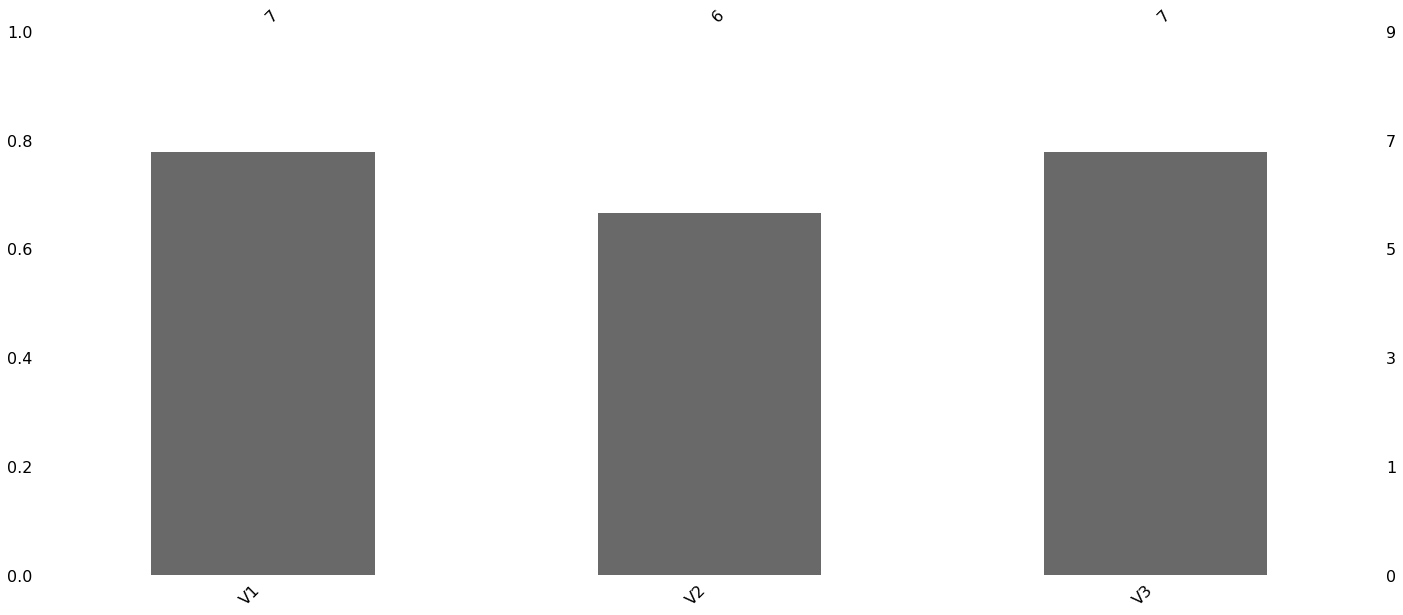

In [ ]:
import missingno as msno
msno.bar(df);

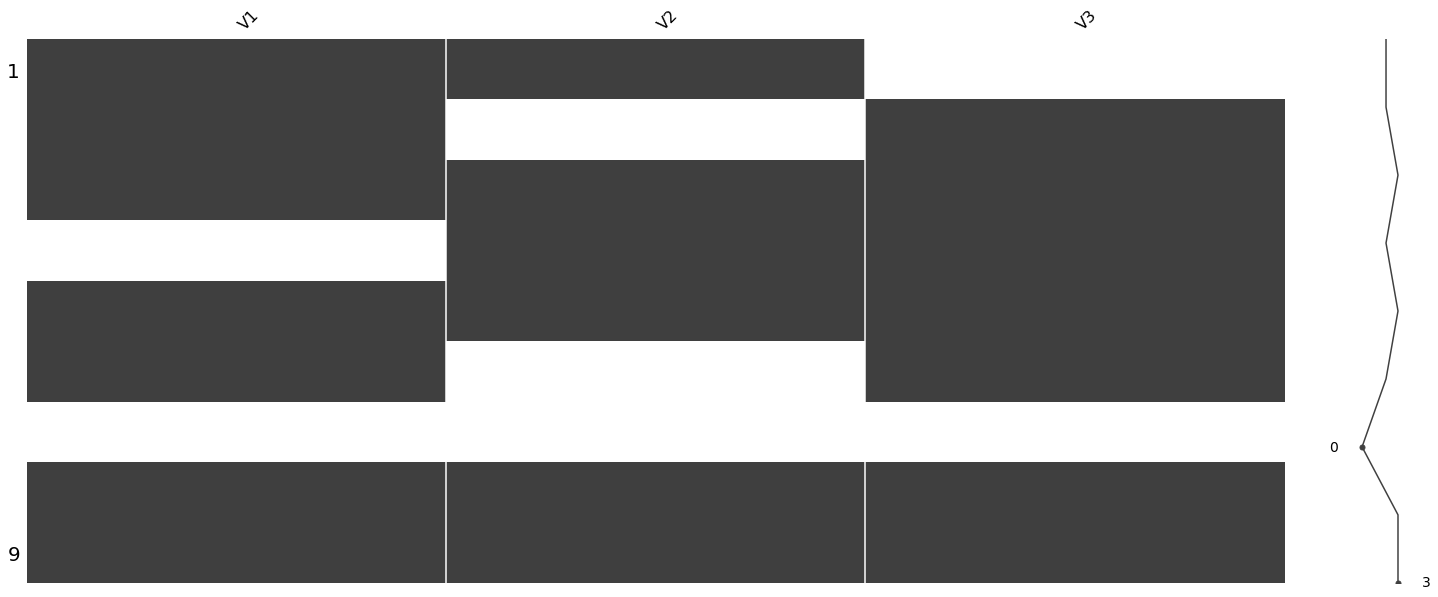

In [ ]:
msno.matrix(df);

In [ ]:
import seaborn as sns
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

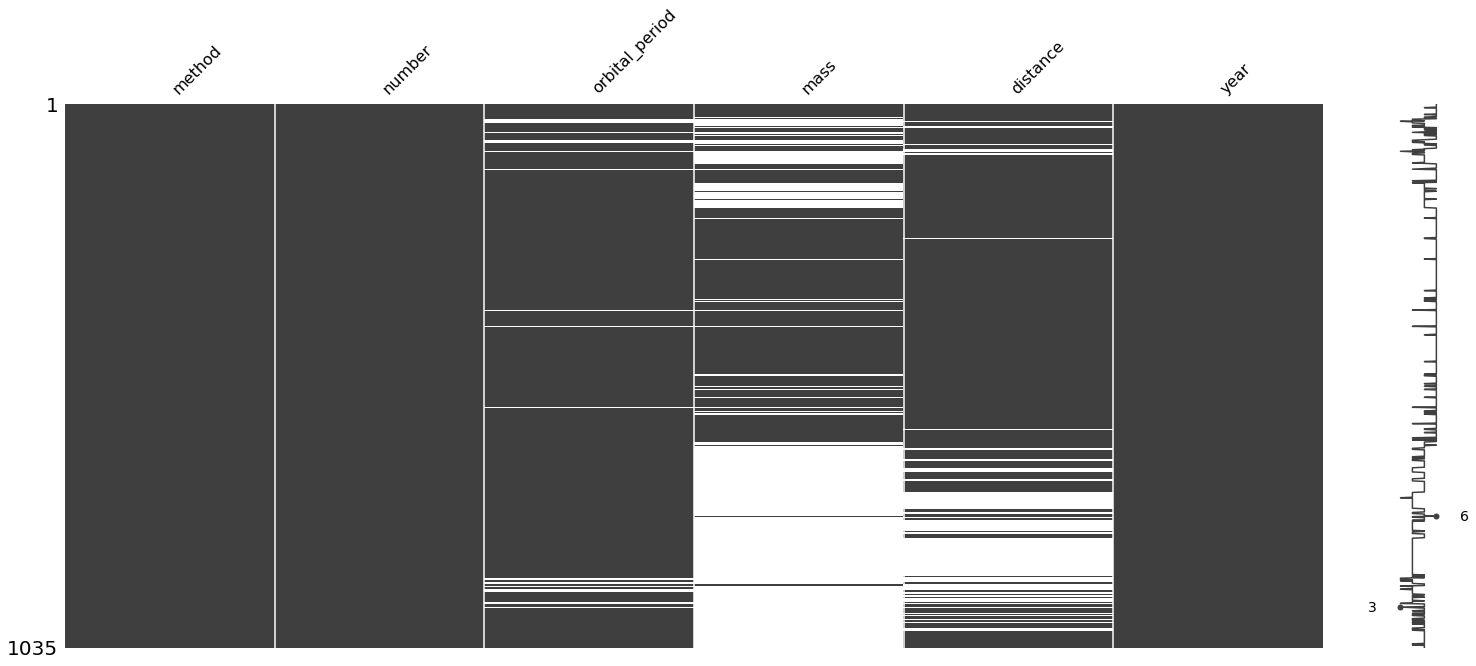

In [ ]:
msno.matrix(df);

heatmap iki değişkenin eksik değerlerinin birbiriyle olan ilişkisini gösterir.

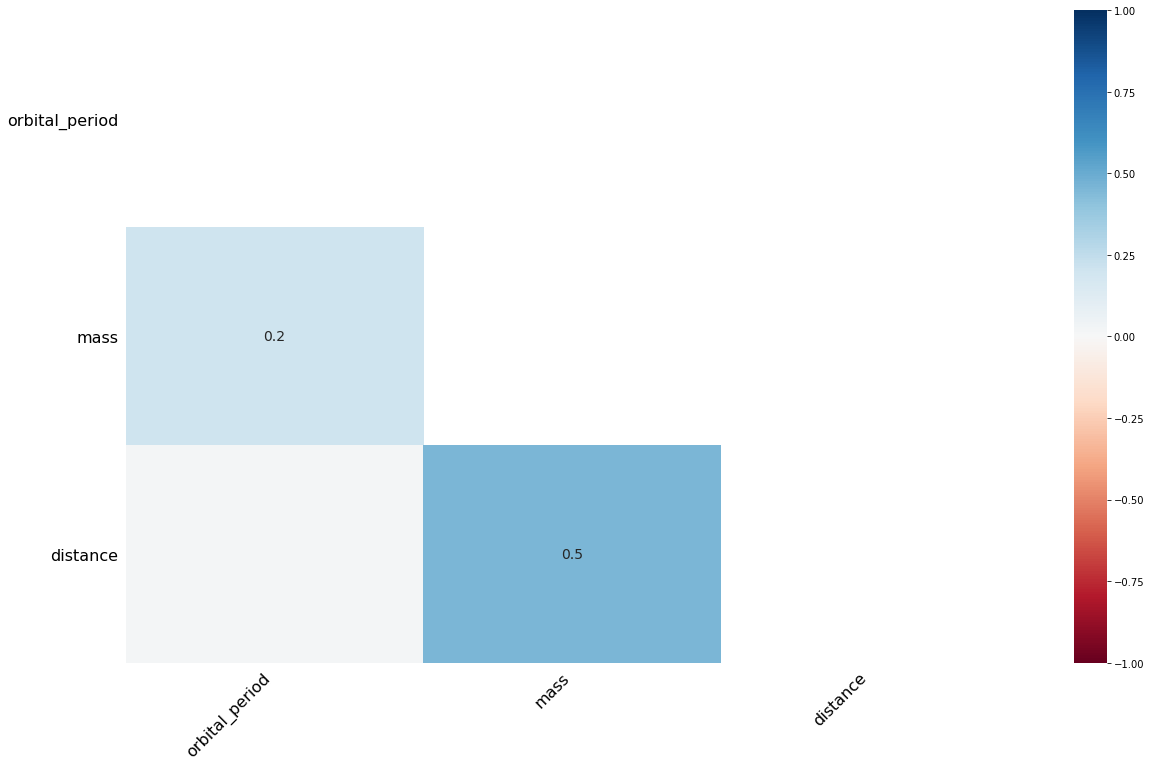

In [ ]:
msno.heatmap(df);

In [ ]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Eksik gözlemleri ilk olarak setten atabiliriz.

In [ ]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


burda da tüm değerleri eksik olan gözlemleri attık.

In [ ]:
df = df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


eksik olan değişkenleri sildik.

In [ ]:
df.dropna(how= "all",axis=0,inplace=True)

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
df.dropna(axis=1,how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
df["delete_me"] = np.NaN

In [ ]:
df

,V1,V2,V3,delete_me
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


Tüm gözlemler için null olan değişkeni sildik.

In [ ]:
df.dropna(axis=1,how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
df.dropna(axis=1,how="all",inplace=True)

In [ ]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","HR","HR","HR","HR","HR","IT","IT"])
df = pd.DataFrame({"salary":V1,"V2":V2,"V3":V3,"department":V4})
df

,salary,V2,V3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,HR
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,NaN,NaN,NaN,HR
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


departmana göre gruplayıp sonrasında eksik maaş değerlerine departmanın ortalamasını koyduk.

In [ ]:
df.groupby(df.department)["salary"].mean()

department
HR    4.666667
IT    7.000000
Name: salary, dtype: float64

In [ ]:
df.salary.fillna(df.groupby(df.department)["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: salary, dtype: float64

In [ ]:
import numpy as np
import pandas as pd 
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])

V4 = np.array(["IT",np.NaN,"HR","HR","HR","HR","HR","IT","IT"],dtype="object")
df = pd.DataFrame({"salary":V1,"department":V4})

In [ ]:
df

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,HR
7,9.0,IT
8,15.0,IT


In [ ]:
mod = df.department.mode()[0]
mod

'HR'

Eksik kategorik veriyi en çok tekrar eden veriyle değiştirdik.

In [ ]:
df.department.fillna(mod)

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    IT
Name: department, dtype: object

Bir sonraki ile doldurduk.

In [ ]:
df.department.fillna(method="bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    IT
Name: department, dtype: object

Bir önceki ile doldurduk.

In [ ]:
df.department.fillna(method="ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    IT
Name: department, dtype: object

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [ ]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
pip install ycimpute

Makine öğrenmesi algoritmalarını kullanarak eksik değerleri doldurduk.


In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
var_names = list(df)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
df[301:401].tail(50)

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k=4).complete(n_df)

In [ ]:
type(dff)

In [ ]:
dff = pd.DataFrame(dff,columns=var_names)

In [ ]:
type(dff)

In [ ]:
dff

In [ ]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [ ]:
var_names = list(df)
import numpy as np
n_df = np.array(df)

In [ ]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

AttributeError: ignored

In [ ]:
from ycimpute.imputer import EM
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff,columns=var_names)
dff

In [ ]:
import numpy as np 
import pandas as pd 
V1 = np.array([1,3,6,5,7])
V2  = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})
df=df.astype(float)
df

In [ ]:
from sklearn import preprocessing

Verilerimizi ölçeklendirdik.

In [ ]:
preprocessing.scale(df)

array([[-0.78927234,  0.82737724, -0.53037664,  0.43279337, -0.47367361,
        -0.50244517],
       [ 1.2669898 , -1.56610693,  0.57183099,  0.43279337, -0.47367361,
         0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25482473, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [-0.78927234,  0.82737724,         nan,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25482473, -0.4745452 , -0.47367361,
        -0.04438104],
       [-0.78927234,  0.82737724,  0.15850313, -0.4745452 , -0.47367361,
        -0.49237783]])

In [ ]:
df.mean()

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

normalize ettik.

In [ ]:
df = df.dropna()
preprocessing.normalize(df)


,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [ ]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [ ]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

Kategorik değişkenleri kategorilerine göre numaralandırdık.

In [ ]:
lbe.fit_transform(df.sex)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
df["new_sex"] = lbe.fit_transform(df.sex)

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


burda da pazar günlerini 1 ile diğer günleri 0 ile doldurduk.

In [ ]:
df["new_day"] = np.where(df["day"].str.contains("Sun"),1,0)
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()


burda da label encoder kullanarak değişkenlerimizi numaralandırdık.

In [ ]:
lbe.fit_transform(df.day)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
o = OneHotEncoder()

In [ ]:
new_time = o.fit_transform(df).toarray()


array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [ ]:
new_time = l.fit_transform(df.time)
df["new_time"] = new_time
df

,total_bill,tip,sex,smoker,day,time,size,new_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0
0,16.99,1.01,Female,No,Sun,Dinner,2,0


burda da değiknelerimizi parçaladık.

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2


In [ ]:
df_one_hot= pd.get_dummies(df,columns=["sex"],prefix=["sex"])

In [ ]:
df_one_hot

In [ ]:
df_one_hot= pd.get_dummies(df,columns=["day"],prefix=["day"])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000
